In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('housing data.csv')

In [3]:
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [4]:
# Shape of the data
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])

Rows: 1418
Columns: 13


In [5]:
# Information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


From the above info we can see that there are few missing values in electrical, Garage type and lot of missing values in Fence and Misc Feature

In [6]:
# Since OveralQual, FullBath, GarageCars are numbers but they represent a 
# categorical data. Lets convert them to object datatype
for i in ['OverallQual','FullBath','GarageCars']:
    data[i] = data[i].astype(object)

In [7]:
# Lets drop ID since its just an index value from 1 to 1418
del data['Id']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OverallQual  1418 non-null   object
 1   YearBuilt    1418 non-null   int64 
 2   TotalBsmtSF  1418 non-null   int64 
 3   Electrical   1417 non-null   object
 4   GrLivArea    1418 non-null   int64 
 5   FullBath     1418 non-null   object
 6   GarageType   1275 non-null   object
 7   GarageCars   1418 non-null   object
 8   GarageArea   1418 non-null   int64 
 9   Fence        270 non-null    object
 10  MiscFeature  52 non-null     object
 11  SalePrice    1418 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 133.1+ KB


In [9]:
# lets look at the description of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.0,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.5,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.0,5642.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.0,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.0,755000.0


From the five point summary we can get a hint of outliers in TotalBasmtSF, GrLivArea, GarageArea,
SalePrice

In [10]:
data.describe(include=object).T

,count,unique,top,freq
OverallQual,1418,10,5,380
Electrical,1417,5,SBrkr,1300
FullBath,1418,4,2,747
GarageType,1275,6,Attchd,800
GarageCars,1418,5,2,787
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


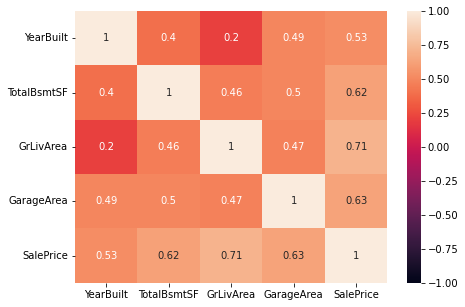

In [11]:
# Corelation Heatmap
#plt.rcParams['figure.figsize']=(7,5)
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

In [12]:
# Inferences:

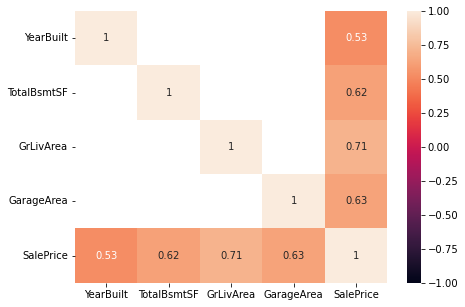

In [13]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr()[(data.corr()>0.5)|(data.corr()<-0.5)],annot=True,vmax=1,vmin=-1)
plt.show()

In [14]:
# Lets look at the coefficient of variance in columns
(data.select_dtypes(np.number).std()/data.select_dtypes(np.number).mean())*100

YearBuilt       1.524867
TotalBsmtSF    41.186073
GrLivArea      34.706296
GarageArea     45.717425
SalePrice      43.918480
dtype: float64

In [15]:
# inferences:

## UNIVARIATE ANALYSIS

In [16]:
# Take the number columns
data.select_dtypes(np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   YearBuilt    1418 non-null   int64
 1   TotalBsmtSF  1418 non-null   int64
 2   GrLivArea    1418 non-null   int64
 3   GarageArea   1418 non-null   int64
 4   SalePrice    1418 non-null   int64
dtypes: int64(5)
memory usage: 55.5 KB


In [17]:
data_num = data.select_dtypes(np.number)
data_num.head()

,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
0,2003,856,1710,548,208500
1,1976,1262,1262,460,181500
2,2001,920,1786,608,223500
3,1915,756,1717,642,140000
4,2000,1145,2198,836,250000


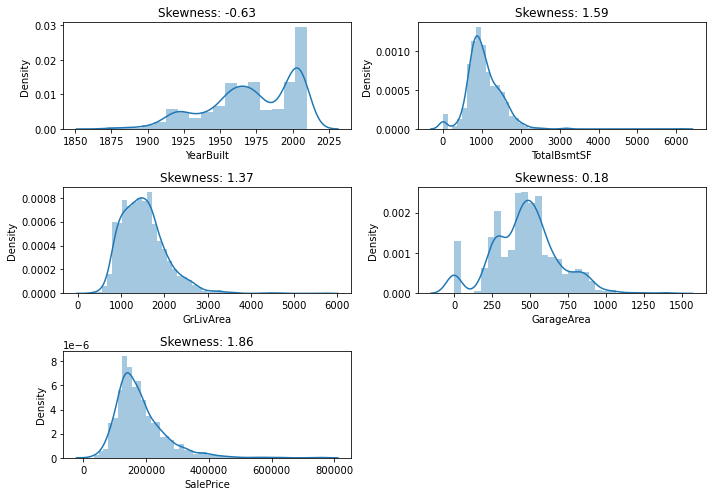

In [18]:
plt.figure(figsize=(10,7))
t=1
for i in data_num.columns:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.title('Skewness: %.2f'%(data[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

In [19]:
# Inferences: 

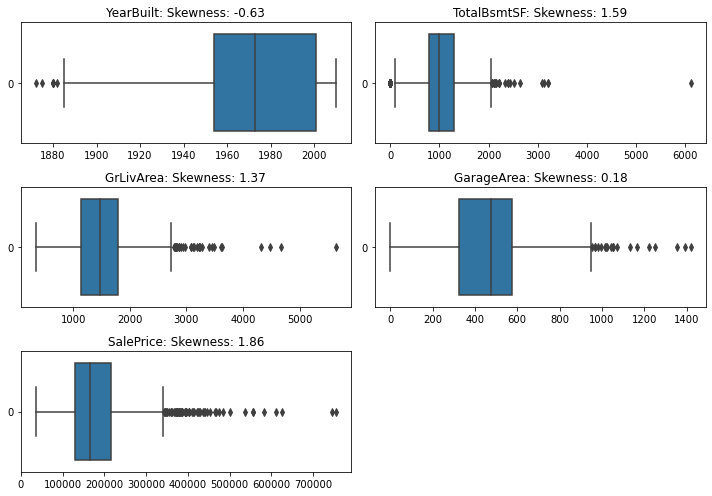

In [20]:
plt.figure(figsize=(10,7))
t=1
for i in data_num.columns:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],orient='h')
    plt.title('%s: Skewness: %.2f'%(i,data[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

In [21]:
# Inferences: 

In [22]:
# Lets take category columns
data_cat = data.select_dtypes(object)
data_cat.head()

,OverallQual,Electrical,FullBath,GarageType,GarageCars,Fence,MiscFeature
0,7,SBrkr,2,Attchd,2,NaN,NaN
1,6,SBrkr,2,Attchd,2,NaN,NaN
2,7,SBrkr,2,Attchd,2,NaN,NaN
3,7,SBrkr,1,Detchd,3,NaN,NaN
4,8,SBrkr,2,Attchd,3,NaN,NaN


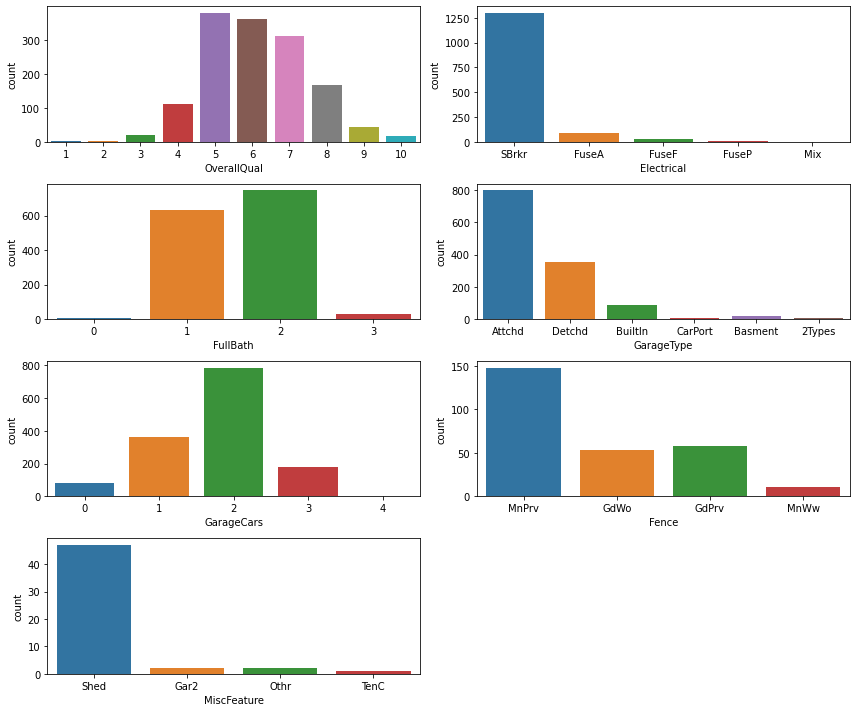

In [23]:
plt.figure(figsize=(12,10))
t=1
for i in data_cat.columns:
    plt.subplot(4,2,t)
    sns.countplot(data=data,x=i)
    t=t+1
plt.tight_layout()
plt.show()

In [24]:
# inference

## BIVARIATE ANALYSIS

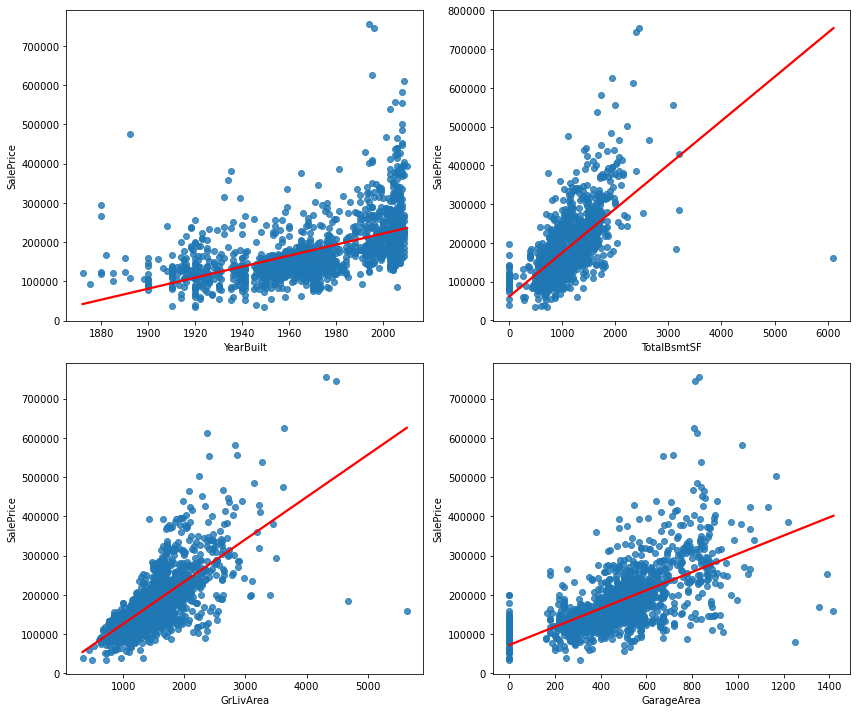

In [25]:
# Lets do Number vs Number analysis
plt.figure(figsize=(12,10))
t = 1
for i in data_num.columns:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data[i],y=data['SalePrice'],line_kws={'color':'red'},ci=0)
    t+=1
plt.tight_layout()
plt.show()

In [26]:
# inferences: 

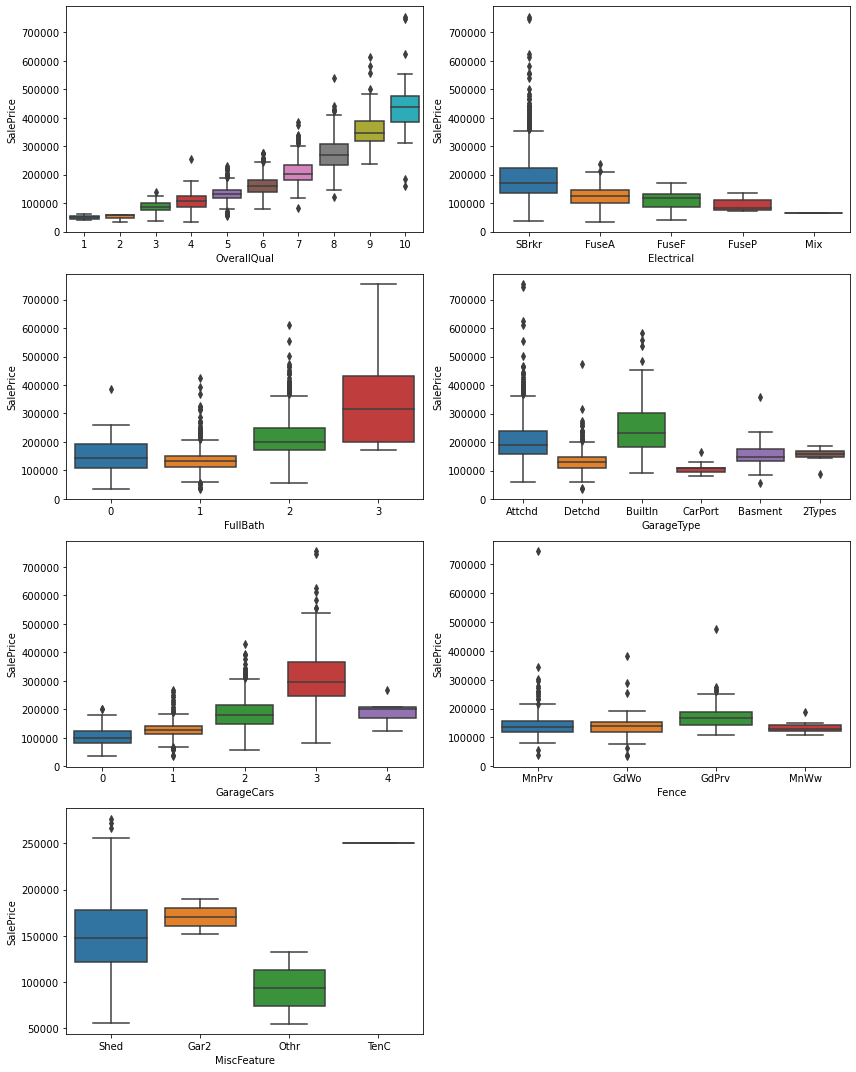

In [27]:
# Lets do Number vs category analysis
plt.figure(figsize=(12,15))
t = 1
for i in data_cat.columns:
    plt.subplot(4,2,t)
    sns.boxplot(data=data,x=i,y='SalePrice')
    t+=1
plt.tight_layout()
plt.show()

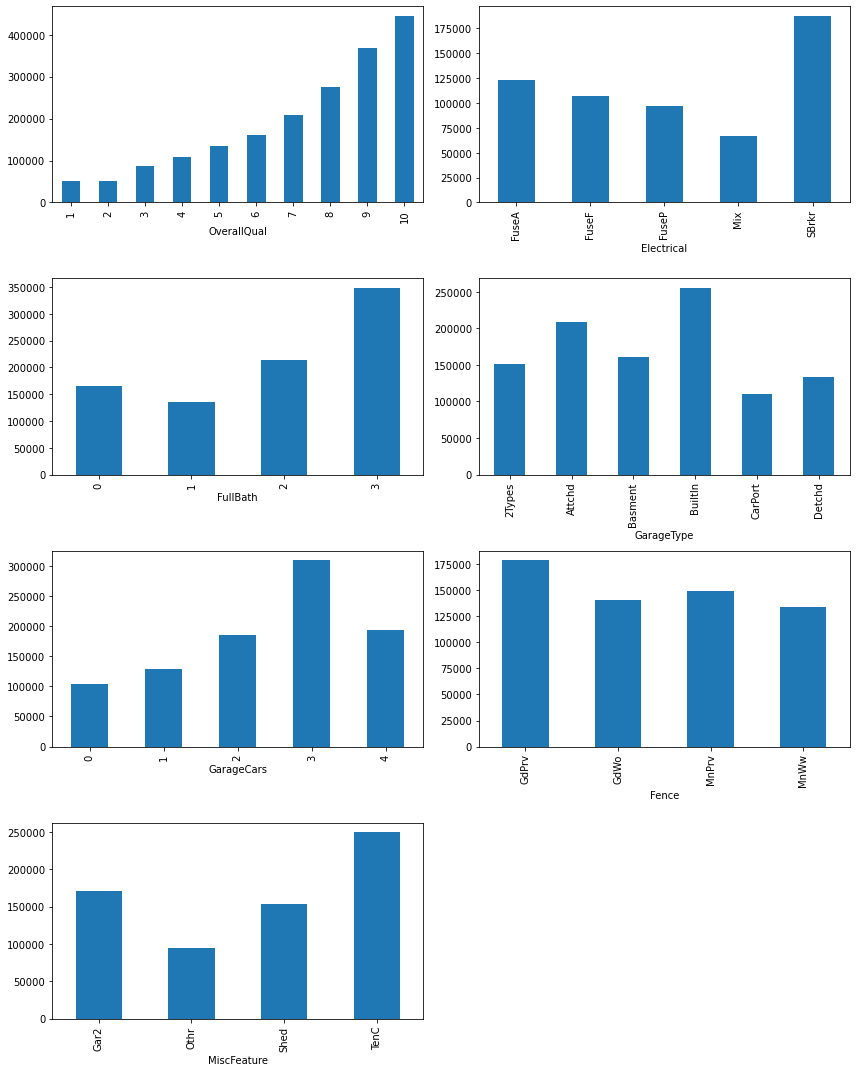

In [28]:
plt.figure(figsize=(12,15))
t = 1
for i in data_cat.columns:
    plt.subplot(4,2,t)
    data.groupby(i)['SalePrice'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

## Statistical test

In [29]:
# Target variable is mostly affected by:
# GrLivArea
# TotalBsmtsf
# OverallQual
# FullBath
# GarageCars

In [30]:
# SalePrice vs GrLivArea

# test the assumptions (Normality,equal variances)
for i in ['SalePrice','GrLivArea']:
    _,p = stats.shapiro(data[i])
    if p<0.05:
        print(i,'Reject the H0: Data is not normal')
    else:
        print(i,'Fail to reject H0: Data is normal')
        

_,p = stats.levene(data['SalePrice'],data['GrLivArea'])
if p<0.05:
    print(i,'Reject the H0: Variances are not equal')
else:
    print(i,'Fail to reject H0: Variances are equal')

SalePrice Reject the H0: Data is not normal
GrLivArea Reject the H0: Data is not normal
GrLivArea Reject the H0: Variances are not equal


In [31]:
# We will go with the non parametric test - mannwhitnyu
# H0: mu1 = mu2 : There is no relation between SalePrice and GrLivArea
# H1: mu1 != mu2 : There is relation between SalePrice and GrLivArea
_,p=stats.mannwhitneyu(data['SalePrice'],data['GrLivArea'])
if p<0.05:
    print('Reject H0: There is relation between SalePrice and GrLivArea')
else:
    print('Fail to reject H0: There is no relation between SalePrice and GrLivArea')

Reject H0: There is relation between SalePrice and GrLivArea


In [32]:
# SalePrice vs TotalBsmtSF

# test the assumptions (Normality,equal variances)
for i in ['SalePrice','TotalBsmtSF']:
    _,p = stats.shapiro(data[i])
    if p<0.05:
        print(i,'Reject the H0: Data is not normal')
    else:
        print(i,'Fail to reject H0: Data is normal')
        

_,p = stats.levene(data['SalePrice'],data['TotalBsmtSF'])
if p<0.05:
    print(i,'Reject the H0: Variances are not equal')
else:
    print(i,'Fail to reject H0: Variances are equal')

SalePrice Reject the H0: Data is not normal
TotalBsmtSF Reject the H0: Data is not normal
TotalBsmtSF Reject the H0: Variances are not equal


In [33]:
# We will go with the non parametric test - mannwhitnyu
# H0: mu1 = mu2 : There is no relation between SalePrice and TotalBsmtSF
# H1: mu1 != mu2 : There is relation between SalePrice and TotalBsmtSF
_,p=stats.mannwhitneyu(data['SalePrice'],data['TotalBsmtSF'])
if p<0.05:
    print('Reject H0: There is relation between SalePrice and TotalBsmtSF')
else:
    print('Fail to reject H0: There is no relation between SalePrice and TotalBsmtSF')

Reject H0: There is relation between SalePrice and TotalBsmtSF


In [34]:
# Lets check wether there is any effect of FullBath on sale price

# Lets check the assumptions

for i in range(0,4):
    _,p = stats.shapiro(data[data['FullBath']==i]['SalePrice'])
    if p<0.05:
        print('FullBath',i,'Reject the H0: Data is not normal')
    else:
        print('FullBath',i,'Fail to reject H0: Data is normal')
        
samp1 = data[data['FullBath']==0]['SalePrice']
samp2 = data[data['FullBath']==1]['SalePrice']
samp3 = data[data['FullBath']==2]['SalePrice']
samp4 = data[data['FullBath']==3]['SalePrice']

_,p = stats.levene(samp1,samp2,samp3,samp4)
if p<0.05:
    print('Reject the H0: Variances are not equal')
else:
    print('Fail to reject H0: Variances are equal')

FullBath 0 Fail to reject H0: Data is normal
FullBath 1 Reject the H0: Data is not normal
FullBath 2 Reject the H0: Data is not normal
FullBath 3 Reject the H0: Data is not normal
Reject the H0: Variances are not equal


In [35]:
# Assumptions does not meet we can go with non parametric test- kruskal Wallis
# H0: The fullbath has no relation with Saleprice
# H1: The fullbath has relation with Saleprice
_,p = stats.kruskal(samp1,samp2,samp3,samp4)
if p<0.05:
    print('Reject H0: The fullbath has relation with Saleprice')
else:
    print('Fail to reject H0: The fullbath has no relation with Saleprice ')

Reject H0: The fullbath has relation with Saleprice


# DATA PREPROCESSING

## Missing Value Treatment

In [36]:
# You can perform these three steps to treat missing values
# closest fit
# central value (mean,median mode)
# delete (when nan is very few in rows or very much in columns)

In [37]:
# How much % data is missing in each column
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [38]:
# Lets impute the values in electrical
data[data['Electrical'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [39]:
data['Electrical'].mode()[0]

'SBrkr'

In [40]:
# lets inmpute theis value with mode
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [41]:
# Lets impute the values in garage Type
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [42]:
data.loc[(data['GarageCars']==0)&(data['GarageArea']==0),'GarageType'] = 'NoGarage'

In [43]:
data['GarageType'].value_counts()

Attchd      800
Detchd      354
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [44]:
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
47,5,1966,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,6,1942,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500
1317,5,1966,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000
1357,5,1950,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000


In [45]:
# Lets calculate the mode of garage type where garage cars is 1
data[data['GarageCars']==1]['GarageType'].mode()[0]

'Detchd'

In [46]:
data['GarageType'].fillna(data[data['GarageCars']==1]['GarageType'].mode()[0],inplace=True)

In [47]:
# Now lets impute the missing values in Misc Features and Fence

In [48]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,5,1950,1078,FuseA,1078,1,Detchd,1,240,NaN,NaN,142125


In [49]:
# Lets do the imputations in fence
data['Fence'].value_counts()

MnPrv    148
GdPrv     58
GdWo      53
MnWw      11
Name: Fence, dtype: int64

In [50]:
data['Fence'] = np.where(data['Fence'].isnull(),0,1)

In [51]:
data['Fence'].value_counts()

0    1148
1     270
Name: Fence, dtype: int64

In [52]:
stats.shapiro(data[data['Fence']==1]['SalePrice'])

ShapiroResult(statistic=0.7092496156692505, pvalue=2.283013441936563e-21)

In [53]:
samp1 = data[data['Fence']==1]['SalePrice']
samp2 = data[data['Fence']==0]['SalePrice']
_,p = stats.mannwhitneyu(samp1,samp2)

In [54]:
if p<0.05:
    print('Reject H0: There is relation between SalePrice and Fence')
else:
    print('Fail to reject H0: There is no relation between SalePrice and Fence')

Reject H0: There is relation between SalePrice and Fence


In [55]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,0,NaN,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,0,NaN,181500
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,0,NaN,223500
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,0,NaN,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,0,NaN,250000
